**Data Exploration**

Loading Anime Dataset

In [1]:
import pandas as pd

anime = pd.read_csv('anime.csv')

anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


Unique Anime Titles in the Dataset

In [2]:
len(anime['name'].unique())

12292

Dropping Rows with Missing Data

In [3]:
anime = anime.dropna()

Removing Duplicates Based on Anime Name

In [4]:
anime = anime.drop_duplicates(subset='name', keep='first')
print(anime)
print(len(anime['name'].unique()))

       anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Supernatural  Movie        1   
1      

Exploring Dataset Summary

In [5]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12015 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12015 non-null  int64  
 1   name      12015 non-null  object 
 2   genre     12015 non-null  object 
 3   type      12015 non-null  object 
 4   episodes  12015 non-null  object 
 5   rating    12015 non-null  float64
 6   members   12015 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 750.9+ KB


Loading the Rating Dataset

In [6]:
rating = pd.read_csv('rating.csv')
rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


Counting Unique Anime IDs in Ratings

In [7]:
len(rating['anime_id'].unique())

11200

Removing Movies with No Ratings

In [8]:
rating = rating[rating["rating"] >= 0]
rating

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


Merging Anime and Rating Datasets

In [9]:
data = anime.merge(rating, how = "left", on = ["anime_id"])
data

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99.0,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152.0,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244.0,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271.0,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322.0,10.0
...,...,...,...,...,...,...,...,...,...
6339263,5543,Under World,Hentai,OVA,1,4.28,183,49503.0,4.0
6339264,5543,Under World,Hentai,OVA,1,4.28,183,58483.0,1.0
6339265,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,49503.0,6.0
6339266,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365.0,4.0


Exploring Dataset Summary

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6339268 entries, 0 to 6339267
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   anime_id  int64  
 1   name      object 
 2   genre     object 
 3   type      object 
 4   episodes  object 
 5   rating_x  float64
 6   members   int64  
 7   user_id   float64
 8   rating_y  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 435.3+ MB


Renaming Rating Columns for Clarity

In [11]:
data= data.rename(columns={'rating_y': 'personal_rate'})
data= data.rename(columns={'rating_x': 'overall_rate'})

Statistical Summary of the Dataset

In [12]:
data.describe()

,anime_id,overall_rate,members,user_id,personal_rate
count,6.339268e+06,6.339268e+06,6.339268e+06,6.337144e+06,6.337144e+06
mean,8.907602e+03,7.674435e+00,1.845157e+05,3.674795e+04,7.808543e+00
std,8.885868e+03,6.708575e-01,1.909510e+05,2.101337e+04,1.572439e+00
min,1.000000e+00,1.670000e+00,1.200000e+01,1.000000e+00,1.000000e+00
25%,1.239000e+03,7.290000e+00,4.678100e+04,1.898500e+04,7.000000e+00
50%,6.213000e+03,7.700000e+00,1.170910e+05,3.681500e+04,8.000000e+00
75%,1.411700e+04,8.150000e+00,2.563250e+05,5.487300e+04,9.000000e+00
max,3.451900e+04,1.000000e+01,1.013917e+06,7.351600e+04,1.000000e+01


Checking Missing Values in Each Feature

In [13]:
for feature in data.columns :
    print(f"{feature}\t {data[feature].isna().sum()}")

anime_id	 0
name	 0
genre	 0
type	 0
episodes	 0
overall_rate	 0
members	 0
user_id	 2124
personal_rate	 2124


Dropping Rows with Missing Data

In [14]:
data = data.dropna()
data

,anime_id,name,genre,type,episodes,overall_rate,members,user_id,personal_rate
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99.0,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152.0,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244.0,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271.0,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322.0,10.0
...,...,...,...,...,...,...,...,...,...
6339262,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,58483.0,1.0
6339263,5543,Under World,Hentai,OVA,1,4.28,183,49503.0,4.0
6339264,5543,Under World,Hentai,OVA,1,4.28,183,58483.0,1.0
6339265,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,49503.0,6.0


Calculating Rating Frequency for Each Anime

In [15]:
rating_counts = pd.DataFrame(data["anime_id"].value_counts())
rating_counts

,count
anime_id,
1535,34226
11757,26310
16498,25290
1575,24126
6547,23565
...,...
5621,1
7343,1
12397,1


Excluding Animes with Fewer Than 1000 Ratings

In [16]:
data = data.groupby('anime_id').filter(lambda x: len(x) > 1000)
data

,anime_id,name,genre,type,episodes,overall_rate,members,user_id,personal_rate
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99.0,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152.0,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244.0,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271.0,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322.0,10.0
...,...,...,...,...,...,...,...,...,...
6338897,1639,Boku no Pico,"Hentai, Yaoi",OVA,1,5.13,57355,73328.0,2.0
6338898,1639,Boku no Pico,"Hentai, Yaoi",OVA,1,5.13,57355,73329.0,6.0
6338899,1639,Boku no Pico,"Hentai, Yaoi",OVA,1,5.13,57355,73348.0,4.0
6338900,1639,Boku no Pico,"Hentai, Yaoi",OVA,1,5.13,57355,73389.0,7.0


Number of Animes with Over 1000 Ratings

In [17]:
len(data['anime_id'].unique())

1462

Renaming All Gintama Variants to 'Gintama'

In [18]:
data.loc[data['name'].str.startswith('Gintama', na=False), 'name'] = 'Gintama'

**Top 5 Highest Rated Movies (By Average Rating)**

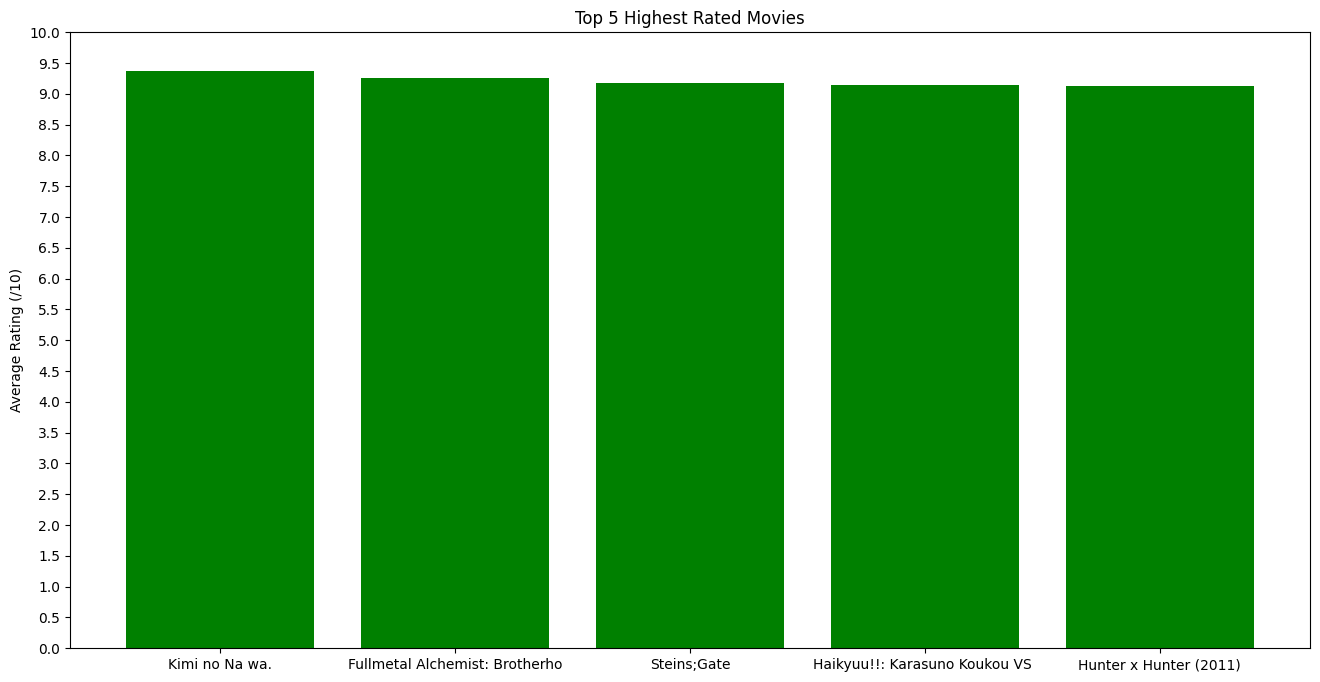

In [19]:
import matplotlib.pyplot as plt
import numpy as np

top_highest_rated = (
    data.groupby('name')['overall_rate']
    .mean()
    .reset_index()
    .sort_values(by='overall_rate', ascending=False)
    .head(5)
)
top_highest_rated['name'] = top_highest_rated['name'].str.slice(0, 30)
plt.figure(figsize=(16,8))
plt.bar(top_highest_rated['name'], top_highest_rated['overall_rate'], color='green')
plt.ylabel('Average Rating (/10)')
plt.title('Top 5 Highest Rated Movies')
plt.yticks(np.arange(0, 10 + 0.1, 0.5))
plt.show()



**Top 5 Most Rated Animes (By Number of Ratings)**

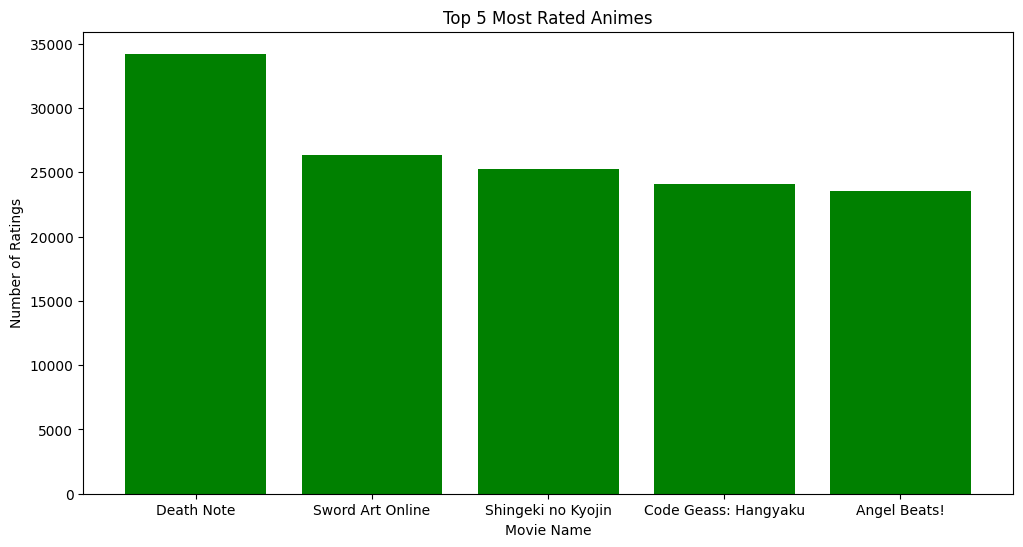

In [20]:


#Top 5 Most Rated Animes
top_rated_animes = (
    data.groupby(['anime_id', 'name'])['user_id']
    .count()
    .reset_index(name='rating_count')
    .sort_values(by='rating_count', ascending=False)
    .head(5)
)
top_rated_animes['name'] = top_rated_animes['name'].str.slice(0, 20)
plt.figure(figsize=(12,6))
plt.bar(top_rated_animes['name'], top_rated_animes['rating_count'],color="green")
plt.xlabel('Movie Name')
plt.ylabel("Number of Ratings")
plt.title('Top 5 Most Rated Animes')
plt.show()

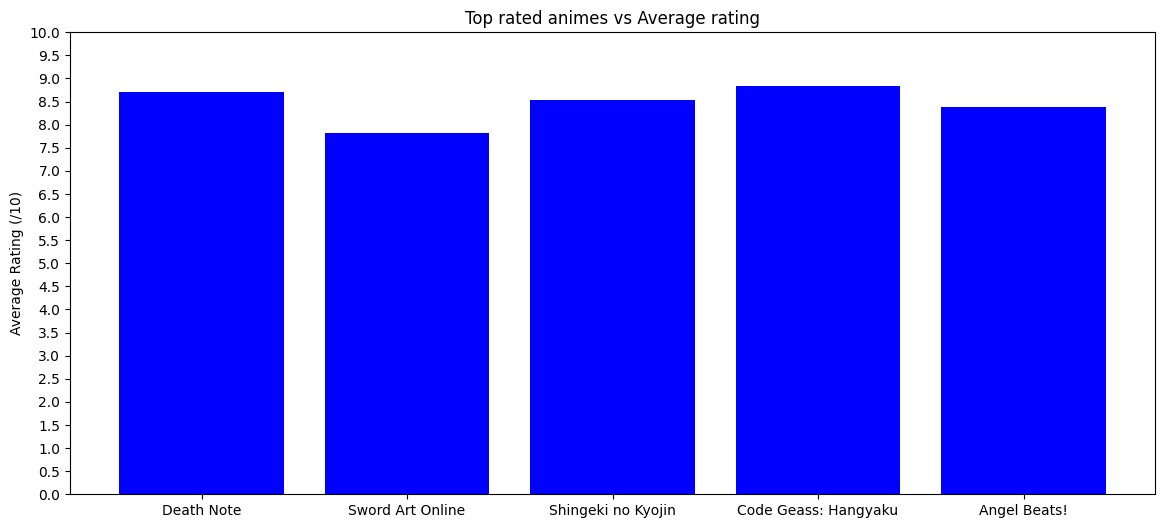

In [21]:
top_rated = top_rated_animes.merge(
    data.groupby(['anime_id'])['overall_rate'].mean().reset_index(),
    on='anime_id'
)
plt.figure(figsize=(14,6))
plt.bar(top_rated['name'] , top_rated['overall_rate'] , color='blue')
plt.ylabel('Average Rating (/10)')
plt.title('Top rated animes vs Average rating')
plt.yticks(np.arange(0, 10 + 0.1, 0.5))
plt.show()

**Analyze the relationship between number of episodes and rating**

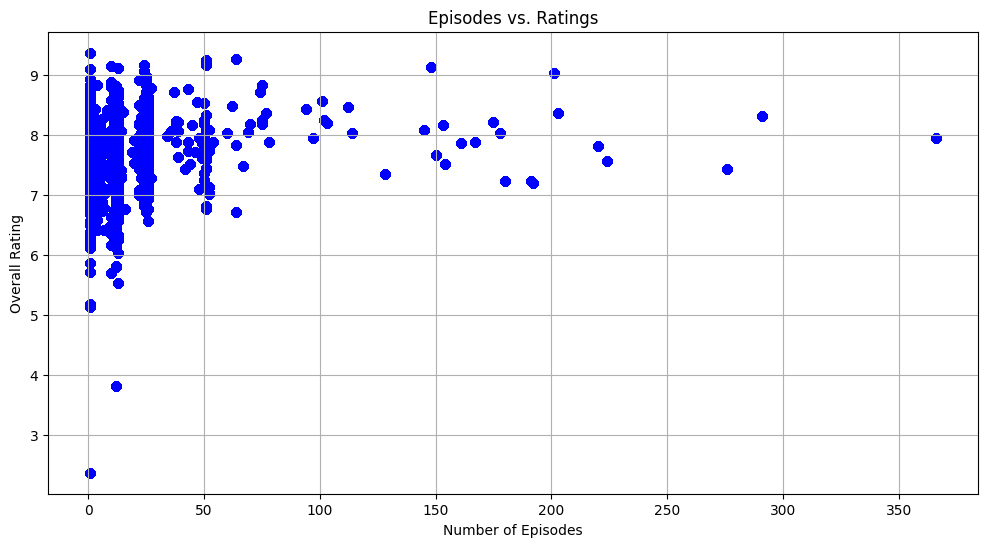

In [22]:
data['episodes'] = pd.to_numeric(data['episodes'], errors='coerce')
plt.figure(figsize=(12,6))
plt.scatter(data['episodes'],data['overall_rate'] , color='blue')
plt.xlabel('Number of Episodes')
plt.ylabel('Overall Rating')
plt.title('Episodes vs. Ratings')
plt.grid(True)
plt.show()

**Top Genres by Popularity**

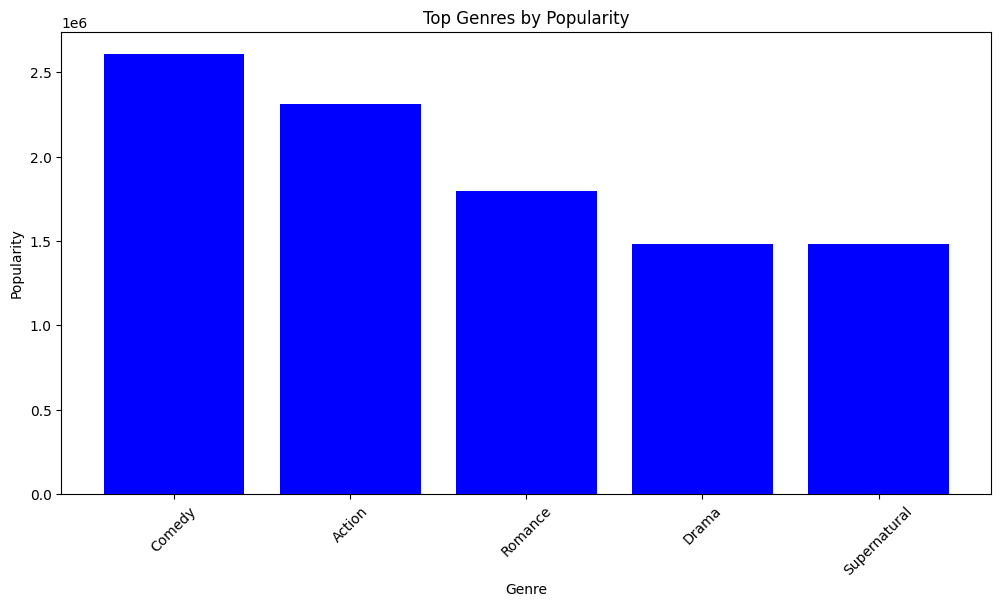

In [23]:
data['genre'] = data['genre'].str.split(', ') 
exploded_data = data.explode('genre') #expands list of genre into separate rows

top_genres = (
    exploded_data.groupby('genre')
    .size()
    .reset_index(name='popularity')
    .sort_values(by='popularity', ascending=False)
    .head(5)
)

plt.figure(figsize=(12, 6))
plt.bar(top_genres['genre'], top_genres['popularity'], color='blue')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.title("Top Genres by Popularity")
plt.xticks(rotation=45)
plt.show()


**Top Type by Popularity**

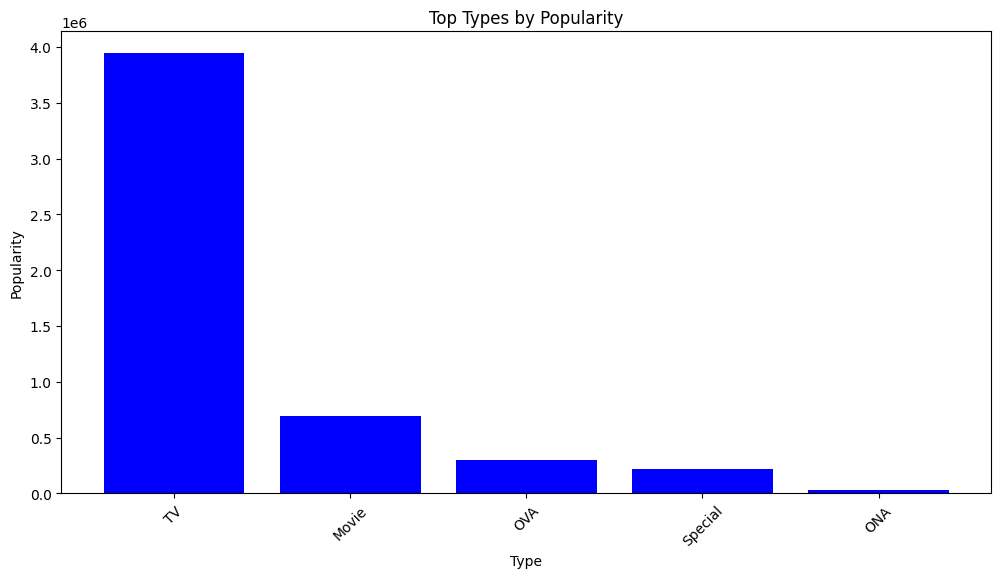

In [24]:
top_types = (
    data.groupby('type')
    .size()
    .reset_index(name='popularity')
    .sort_values(by='popularity', ascending=False)
    .head(5)
)

plt.figure(figsize=(12, 6))
plt.bar(top_types['type'], top_types['popularity'], color='blue')
plt.xlabel('Type')
plt.ylabel('Popularity')
plt.title("Top Types by Popularity")
plt.xticks(rotation=45)
plt.show()


**Identify the longest-running animes with their average ratings**

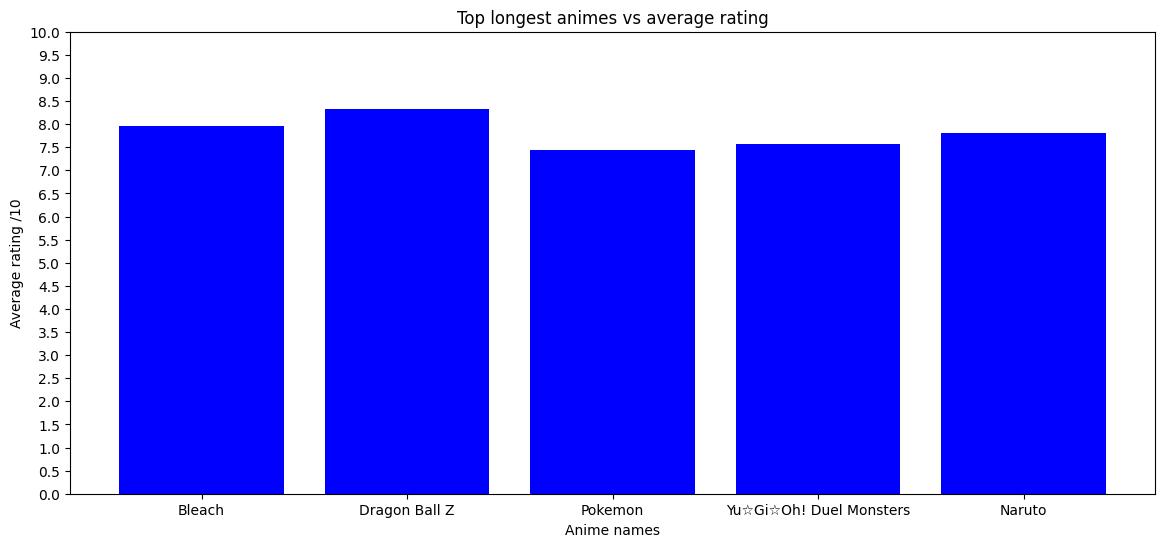

In [25]:
#Get the top 5 longest-running series
top_longest_running = (
    data.groupby(['anime_id', 'name'])['episodes']
    .max()
    .reset_index()
    .sort_values(by='episodes', ascending=False)
    .head(5)
)

#Merge with overall_rate from the original data
top_longest_running_with_rating = top_longest_running.merge(
    data[['anime_id', 'overall_rate']].drop_duplicates(),
    on='anime_id',
    how='left'
)

plt.figure(figsize=(14,6))
plt.bar(top_longest_running_with_rating['name'], top_longest_running_with_rating['overall_rate'],color='blue')
plt.xlabel('Anime names')
plt.ylabel('Average rating /10')
plt.title('Top longest animes vs average rating')
plt.yticks(np.arange(0,10+0.1,0.5))
plt.show()
